<a href="https://colab.research.google.com/github/CarineMS/SpotifyTop10_2019/blob/main/Spotify_Top10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Portifólio Data Science**

by [Carine Soares](https://www.linkedin.com/in/carinemsoares/)

---

<h1>Análise dos Dados do Spotify - Top 50 2019</h1>

Os dados são fornecidos pela comunidade de cientista de dados *Kaggle* que é uma plataforma de aprendizado e prática de Data Science. Por meio do portal [Kaggle](https://www.kaggle.com/leonardopena/top50spotify2019) é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


<center><img alt="Analisando Airbnb" width="100%" src="https://developer.spotify.com/assets/branding-guidelines/logo@2x.png"></center>

<sub>*Neste **notebook**, iremos analisar os dados referentes as TOP 10 músicas do ano de 2019 e analisar quais insights podem ser extraídos a partir de dados brutos.*</sub>

** Dicionário das Variáveis 


* `Track.Name` : Nome da música
* `Artist.Name`: Nome do cantor
* `Genre`: Genero musical
* `Beats.Per.Minute`: Quantidade de batidas por minuto	
* `Energy`: Faixa da intensidade transmitida pela música
* `Danceability`: Medida de dançabilidade	
* `Loudness..dB..`: Volume em décibeis	
* `Liveness`: Medida de probabilidade da gravação ao vivo
* `Valence.`: Positividade musical transmitida	
* `Length.`: Tamanho da música em minutos
* `Acousticness..`: Faixa de quão acustica é a música	
* `Speechiness.`: Quantidade de palavras	
* `Popularity`


### Obtenção dos dados

import df

In [ ]:
# instalação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/top50.csv',encoding='ISO-8859-1')


In [ ]:
df = df.rename(columns={'Unnamed: 0': 'ID'})

In [ ]:
df = df.set_index('ID')

### Overview

head + info

In [ ]:
df.head(3)

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
ID,,,,,,,,,,,,,
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track.Name        50 non-null     object
 1   Artist.Name       50 non-null     object
 2   Genre             50 non-null     object
 3   Beats.Per.Minute  50 non-null     int64 
 4   Energy            50 non-null     int64 
 5   Danceability      50 non-null     int64 
 6   Loudness..dB..    50 non-null     int64 
 7   Liveness          50 non-null     int64 
 8   Valence.          50 non-null     int64 
 9   Length.           50 non-null     int64 
 10  Acousticness..    50 non-null     int64 
 11  Speechiness.      50 non-null     int64 
 12  Popularity        50 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 5.5+ KB


In [ ]:
# Overview dos dados
pd.DataFrame({'type': df.dtypes,
              'nan': df.isna().sum(),
              '%nan': (df.isna().sum()/df.shape[0])*100,
              'nunique':df.nunique()}).reset_index(drop=False)


,index,type,nan,%nan,nunique
0,Track.Name,object,0,0.0,50
1,Artist.Name,object,0,0.0,38
2,Genre,object,0,0.0,21
3,Beats.Per.Minute,int64,0,0.0,31
4,Energy,int64,0,0.0,31
5,Danceability,int64,0,0.0,29
6,Loudness..dB..,int64,0,0.0,9
7,Liveness,int64,0,0.0,22
8,Valence.,int64,0,0.0,39
9,Length.,int64,0,0.0,44


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Beats.Per.Minute,50.0,120.06,30.898392,85.0,96.00,104.5,137.50,190.0
Energy,50.0,64.06,14.231913,32.0,55.25,66.5,74.75,88.0
Danceability,50.0,71.38,11.929880,29.0,67.00,73.5,79.75,90.0
Loudness..dB..,50.0,-5.66,2.056448,-11.0,-6.75,-6.0,-4.00,-2.0
Liveness,50.0,14.66,11.118306,5.0,8.00,11.0,15.75,58.0
Valence.,50.0,54.60,22.336024,10.0,38.25,55.5,69.50,95.0
Length.,50.0,200.96,39.143879,115.0,176.75,198.0,217.50,309.0
Acousticness..,50.0,22.16,18.995553,1.0,8.25,15.0,33.75,75.0
Speechiness.,50.0,12.48,11.161596,3.0,5.00,7.0,15.00,46.0
Popularity,50.0,87.50,4.491489,70.0,86.00,88.0,90.75,95.0


In [ ]:
df['Artist.Name'].value_counts()

Ed Sheeran          4
Shawn Mendes        2
Lil Nas X           2
J Balvin            2
Sech                2
Billie Eilish       2
The Chainsmokers    2
Marshmello          2
Post Malone         2
Ariana Grande       2
ROSALÍA             1
Khalid              1
Lady Gaga           1
Daddy Yankee        1
Kygo                1
Lauv                1
Jonas Brothers      1
Martin Garrix       1
Katy Perry          1
Young Thug          1
Maluma              1
Taylor Swift        1
Jhay Cortez         1
Ali Gatie           1
Tones and I         1
Lunay               1
Anuel AA            1
MEDUZA              1
Lizzo               1
Y2K                 1
Chris Brown         1
Drake               1
Lewis Capaldi       1
DJ Snake            1
Bad Bunny           1
Sam Smith           1
Lil Tecca           1
Nicky Jam           1
Name: Artist.Name, dtype: int64

### Limpeza

### Análise dos dados / Análise Exploratória

### Dados ausentes


In [ ]:
((df.isnull().sum() / df.shape[0]) *100).sort_values(ascending=False)

Track.Name          0.0
Artist.Name         0.0
Genre               0.0
Beats.Per.Minute    0.0
Energy              0.0
Danceability        0.0
Loudness..dB..      0.0
Liveness            0.0
Valence.            0.0
Length.             0.0
Acousticness..      0.0
Speechiness.        0.0
Popularity          0.0
dtype: float64

### Valores únicos


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f203e8abd50>,
      dtype=object)

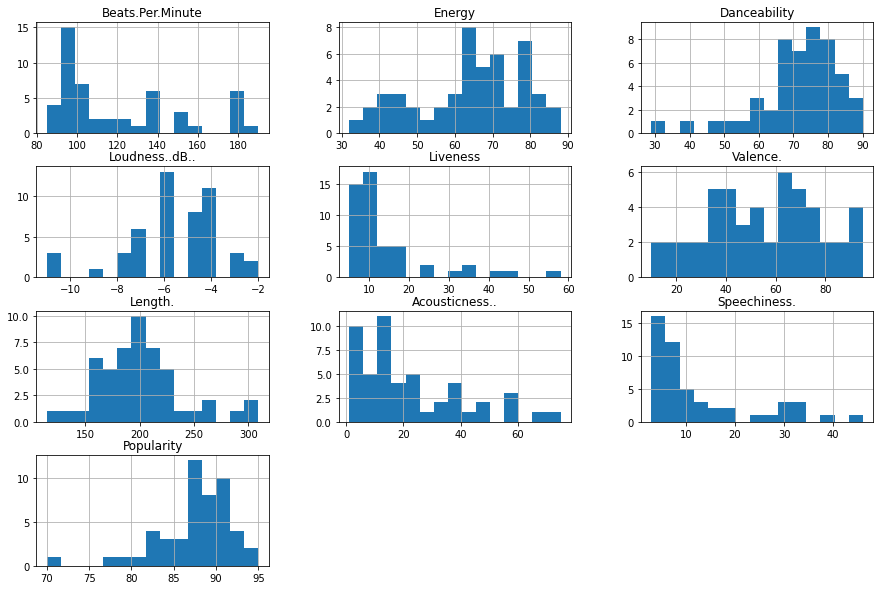

In [ ]:
df.hist(bins=15, figsize=(15,10))

### Conclusões